<a href="https://colab.research.google.com/github/FontanaDaniel1/GeoPandas_esericizi/blob/main/esercitazione_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
%matplotlib inline

import pandas as pd
import geopandas

Visualizzaere il geodataset delel piste ciclabili

In [ ]:
piste_ciclabili = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/bike_ciclabili.zip")
piste_ciclabili

caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
quartieri_milano = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/geopandas/ds964_nil_wm.zip")
quartieri_milano

installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini) e le piste ciclabili

In [ ]:
!pip install contextily
import contextily

In [ ]:
quartieri_milano3857 = quartieri_milano.to_crs(epsg = 3857)
piste_ciclabili3857 = piste_ciclabili.to_crs(epsg = 3857)

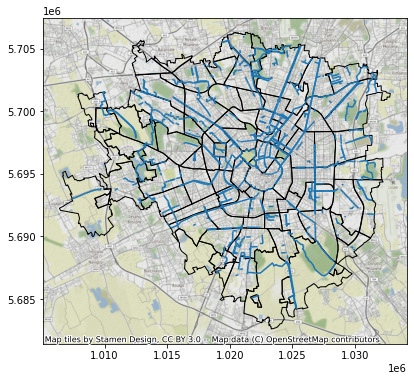

In [ ]:
ax = quartieri_milano3857.plot(figsize=(12,6), edgecolor = 'k', facecolor = 'none')
piste_ciclabili3857.plot(ax = ax)
contextily.add_basemap(ax)

calcolare la dimensione media dell'area dei quartieri di Milano

In [ ]:
quartieri_milano3857["Shape_Area"].mean()

visualizzare i nomi dei quartieri più grandi della media


In [ ]:
media = quartieri_milano3857[quartieri_milano3857["Shape_Area"] > quartieri_milano3857["Shape_Area"].mean()]
media

In [ ]:
media.plot()

visualizzare i quartieri più grandi della media sulla mappa di Milano

In [ ]:
ax = media.plot(edgecolor = 'k', facecolor = 'none')
contextily.add_basemap(ax)

visualizzare una mappa con la legenda in modo che i quartieri più grandi abbiano colori diversi rispetto ai quartieri più piccoli. La scala dei colori deve essere rossa e si deve riuscire ad intravedere in trasparenza la mappa sottostante

In [ ]:
ax = quartieri_milano3857.plot(figsize=(12,6), column = 'Shape_Area', legend = True, cmap = 'Reds', alpha = 0.5) #alpha, serve a rendendere più trasparente la mappa dei quartieri
contextily.add_basemap(ax)

salvare in un geodataframe le informazioni sul quartiere di Greco, prendendole dal geodataframe dei quartieri

In [ ]:
Greco = quartieri_milano3857[quartieri_milano3857['NIL'].str.contains('GRECO')] #trovare un quartiere
Greco

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
17,13,GRECO - SEGNANO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7468.531297,1.768603e+06,106,"POLYGON ((1025497.262 5702124.897, 1025502.138..."


trovare le piste ciclabili che passano per il quartiere di Greco

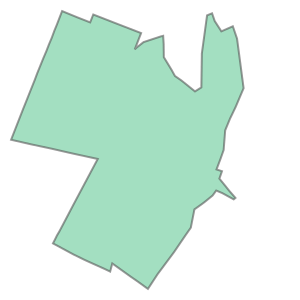

In [ ]:
greco = Greco.geometry.item()
greco

visualizzare su una mappa il quartiere di Greco e le piste ciclabili che lo attraversano evidenziare bene in nero le piste ciclabili 

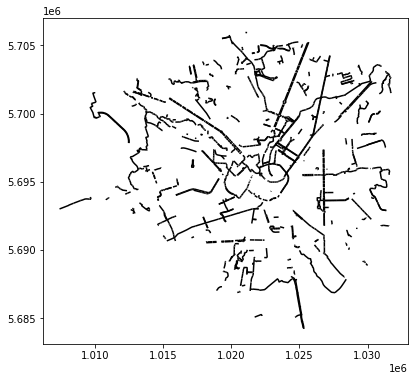

In [ ]:
ax = piste_ciclabili3857.plot(figsize=(12,6), edgecolor = 'k', facecolor = 'none')
#piste_ciclabili3857.plot(ax = ax)
#contextily.add_basemap(ax)
